In [88]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [89]:
raw_data = pd.read_csv('amazon_cells_labelled.txt', header = None, delimiter='\t')
raw_data.columns = ['review', 'rating']

In [90]:
raw_data.describe(include='all')

,review,rating
count,1000,1000.00000
unique,990,NaN
top,Don't buy this product.,NaN
freq,2,NaN
mean,NaN,0.50000
std,NaN,0.50025
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.50000
75%,NaN,1.00000


# Creating a Classifier

So in this model, we will be creating a classifier that can work through multiple instances of similar data. For our first example, we will be using data pulled from Yelp, including their review and either a positive or negative rating, where 1 means positive, and 0 means negative.

We've loaded our data and described it, seeing it's essentially split down the middle. Now the goal is to match exactly what differentiates a positive from a negative comment.

In [91]:
raw_data['review'].unique()

array(['So there is no way for me to plug it in here in the US unless I go by a converter.',
       'Good case, Excellent value.', 'Great for the jawbone.',
       'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
       'The mic is great.',
       'I have to jiggle the plug to get it to line up right to get decent volume.',
       'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
       'If you are Razr owner...you must have this!',
       'Needless to say, I wasted my money.',
       'What a waste of money and time!.',
       'And the sound quality is great.',
       'He was very impressed when going from the original battery to the extended battery.',
       'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
       'Very good quality though',
       'The design is very odd, as the ear "clip" is not very comfortable at al

In [92]:
for item in raw_data['review']:
    item = item.lower()
    item = item.replace('.','')
    item = item.replace('!','')
    item = item.replace(',','')
    print(item)

so there is no way for me to plug it in here in the us unless i go by a converter
good case excellent value
great for the jawbone
tied to charger for conversations lasting more than 45 minutesmajor problems
the mic is great
i have to jiggle the plug to get it to line up right to get decent volume
if you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one
if you are razr owneryou must have this
needless to say i wasted my money
what a waste of money and time
and the sound quality is great
he was very impressed when going from the original battery to the extended battery
if the two were seperated by a mere 5+ ft i started to notice excessive static and garbled sound from the headset
very good quality though
the design is very odd as the ear "clip" is not very comfortable at all
highly recommend for any one who has a blue tooth phone
i advise everyone do not be fooled
so far so good
works great
it clicks into place in a way that makes you

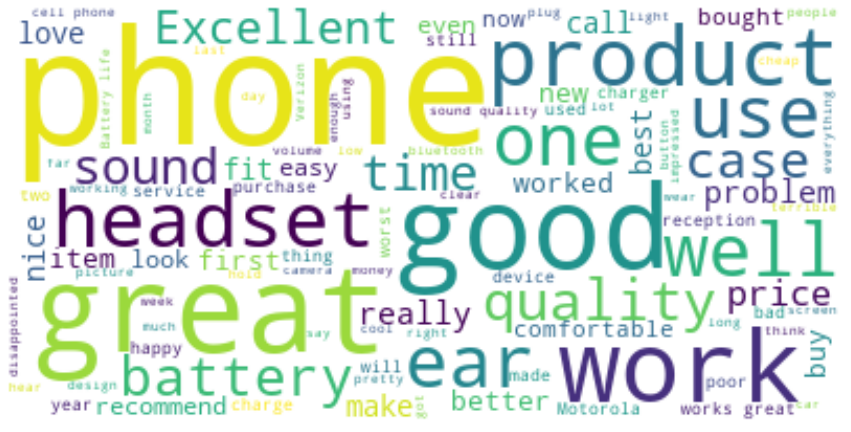

In [93]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='firebrick')

text = " ".join(review for review in raw_data.review)
wc.generate(text)

plt.figure(figsize=(15,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Here, running a quick word cloud, we can get a feel for what words are mostly said throughout these reviews, and we can use our better judgment to see which ones belong in either positive or negative categories. Some are ambiguous, though, so those we will overlook.

In [94]:
positive_keys = ['nice', 'great', 'good', 'best', 'fantastic', 'amazing', 'love', 'well', 'awesome','easy','excellent','quality','work']
negative_keys = ['bad', 'never', 'bland', 'little', 'disappointed', 'worst', 'terrible','poor','cheap','problem','low']

In [95]:
for key in positive_keys:
    raw_data[str(key)] = raw_data.review.str.contains(str(key), case=False)
for key in negative_keys:
    raw_data[str(key)] = raw_data.review.str.contains(str(key), case=False)

In [96]:
positive_data = (raw_data[raw_data['rating']==1])
negative_data = (raw_data[raw_data['rating']==0])
positive_data.drop(columns=negative_keys,inplace=True)
negative_data.drop(columns=positive_keys,inplace=True)

c:\users\jcboy\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


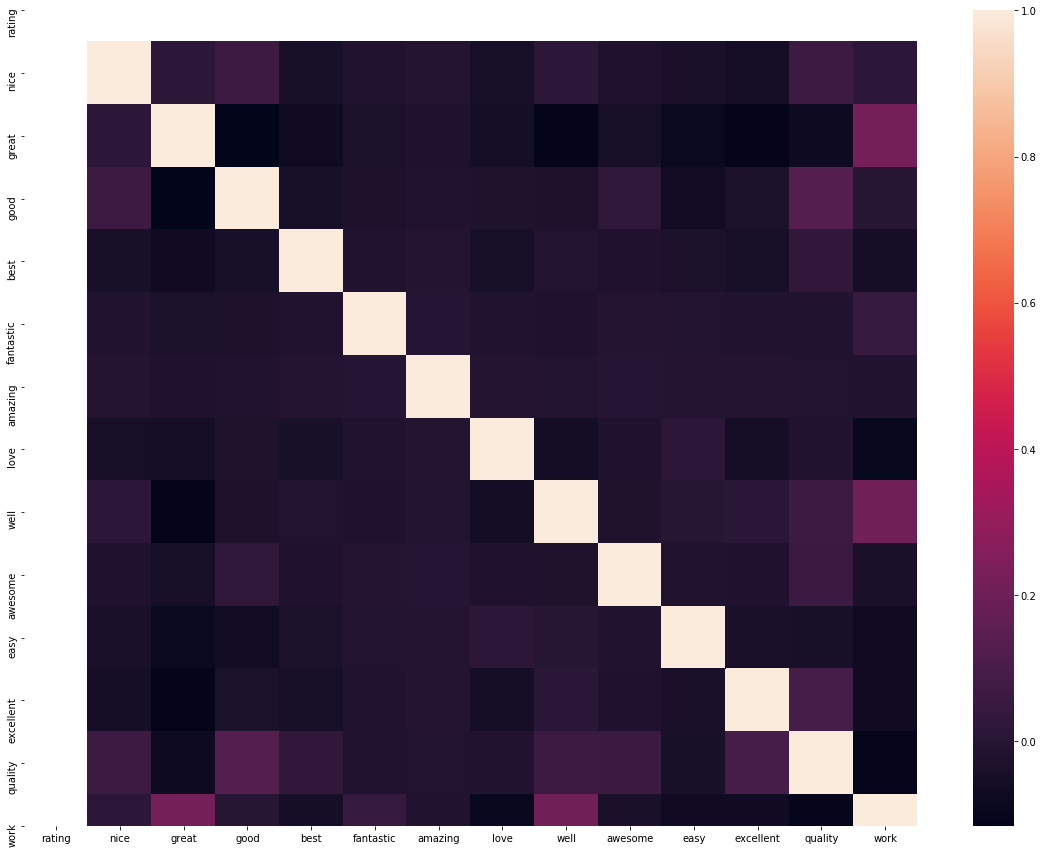

In [97]:
plt.figure(figsize = (20,15))
sns.heatmap(positive_data.corr())

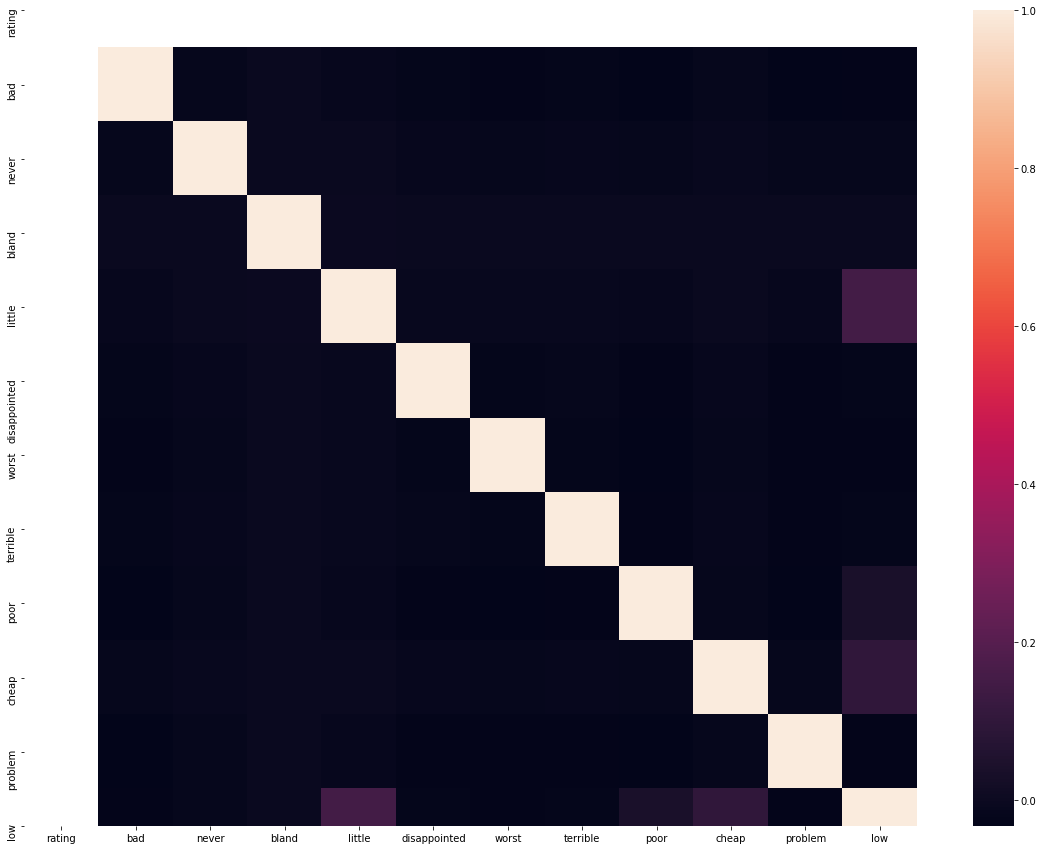

In [98]:
plt.figure(figsize=(20,15))
sns.heatmap(negative_data.corr())

In [99]:
data = raw_data[positive_keys]
target = raw_data['rating']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data,target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)




Number of mislabeled points out of a total 1000 points : 260


array([[467,  33],
       [227, 273]], dtype=int64)

In [100]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=50)

array([0.85, 0.9 , 0.75, 0.75, 0.75, 0.65, 0.65, 0.65, 0.85, 0.85, 0.9 ,
       0.5 , 0.85, 0.9 , 0.7 , 0.75, 0.75, 0.65, 0.85, 0.7 , 0.8 , 0.7 ,
       0.75, 0.7 , 0.8 , 0.55, 0.65, 0.8 , 0.65, 0.55, 0.55, 0.65, 0.75,
       0.7 , 0.8 , 0.7 , 0.75, 0.7 , 0.75, 0.55, 0.65, 0.75, 0.65, 0.75,
       0.8 , 0.75, 0.6 , 0.7 , 0.55, 0.65])

In [101]:
data = raw_data[negative_keys]
target = raw_data['rating']

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data,target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)



Number of mislabeled points out of a total 1000 points : 422


array([[ 97, 403],
       [ 19, 481]], dtype=int64)

In [102]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=50)

array([0.55, 0.5 , 0.65, 0.5 , 0.6 , 0.65, 0.6 , 0.5 , 0.6 , 0.6 , 0.6 ,
       0.6 , 0.6 , 0.55, 0.6 , 0.5 , 0.55, 0.6 , 0.75, 0.55, 0.6 , 0.65,
       0.6 , 0.6 , 0.55, 0.45, 0.55, 0.6 , 0.65, 0.5 , 0.5 , 0.7 , 0.55,
       0.55, 0.55, 0.5 , 0.45, 0.65, 0.5 , 0.5 , 0.55, 0.6 , 0.65, 0.5 ,
       0.6 , 0.65, 0.6 , 0.5 , 0.6 , 0.65])